In [94]:
import pandas as pd

In [96]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [21]:
df_customer=pd.read_csv("C:\\Users\\Joako\\Desktop\\AnalisisDatosEjercicios\\datos\\Customer_service_survey_responses.csv")


In [44]:
df_country=pd.read_csv("C:\\Users\\Joako\\Desktop\\AnalisisDatosEjercicios\\datos\\Country_of_response.csv")

In [29]:
# Ver df cabecera 5 primeras observaciones
df_customer.head()

,username,last_name,first_name,date_of_download,software_package
0,dittoafar45,Andersen,Leocadia,3/4/2016,Basic
1,prowlingglistering253,Lucero,Chad,3/7/2016,Premium
2,expectant2deranged,Randall,Stone,4/6/2016,Plus
3,sulphateplummer,Braun,Emelia,4/8/2016,Basic
4,woatok,Velez,Ridley,6/24/2016,Basic


In [45]:
df_country.head()

,Country,Score,Username,Last name,First name,Date of download,Software package
0,France,3,dittoafar45,Andersen,Leocadia,3/4/2016,Basic
1,France,5,prowlingglistering253,Lucero,Chad,3/7/2016,Premium
2,Belgium,4,expectant2deranged,Randall,Stone,4/6/2016,Plus
3,Germany,9,sulphateplummer,Braun,Emelia,4/8/2016,Basic
4,Portugal,7,woatok,Velez,Ridley,6/24/2016,Basic


In [23]:
# Ver tipos de datos columnas
print(df_customer.dtypes)

Username            object
Last name           object
First name          object
Date of download    object
Software package    object
dtype: object


In [46]:
# Ver tipos de datos columnas df_country
print(df_country.dtypes)

Country             object
Score                int64
Username            object
Last name           object
First name          object
Date of download    object
Software package    object
dtype: object


In [25]:
# Quitar espacios nombres de columnas y sustituir por _
df_customer.columns = [col.replace(' ','_') for col in df_customer.columns]

In [47]:
# Quitar espacios nombres de columnas y sustituir por _ df_country
df_country.columns = [col.replace(' ','_') for col in df_country.columns]

In [27]:
# hacer los nombres minúsculas
df_customer.columns = df_customer.columns.str.lower()

In [48]:
# hacer los nombres minúsculas df_country
df_country.columns = df_country.columns.str.lower()

In [37]:
# Convertir a formato datetime la columna date_of_download '%m/%d/%Y'
df_customer['date_of_download'] = pd.to_datetime(df_customer['date_of_download'], format='%m/%d/%Y')

In [49]:
# Convertir a formato datetime la columna date_of_download '%m/%d/%Y' df_country
df_country['date_of_download'] = pd.to_datetime(df_country['date_of_download'], format='%m/%d/%Y')

In [39]:
# Una manera de ver las fechas en un formato diferente de cómo lo imprime por defecto python
print(df_customer['date_of_download'].sample(5).dt.strftime('%m/%d/%Y'))

134    04/13/2018
121    07/09/2020
23     04/20/2020
73     07/09/2020
140    10/06/2016
Name: date_of_download, dtype: object


In [40]:

df_customer.sample(5)

,username,last_name,first_name,date_of_download,software_package
106,thadicaldoves,Logan,Colleen,2017-07-17,Plus
18,bootseucalyptus888,Rubio,Alesia,2019-10-03,Basic
25,missydate,Shepard,Linden,2016-02-16,Premium
24,feverhoneythunder,Savage,Korey,2020-07-17,Basic
124,wuhangourmet,Munoz,Art,2016-07-07,Basic


In [50]:
df_country.sample(5)

,country,score,username,last_name,first_name,date_of_download,software_package
54,Sweden,4,thornpandemic,Mckay,Kenton,2016-09-02,Premium
86,Indonesia,4,legalgrate,French,Alexina,2017-12-29,Plus
147,United States of America,8,NaN,NaN,NaN,NaT,NaN
13,Norway,8,unicornharmonics493,Logan,Ella,2018-07-19,Plus
40,Sweden,7,shrinepayday,Lester,Alea,2019-02-27,Premium


In [43]:
# Una manera de verificar que no hallan repetidos en la columna username
df_customer.username.value_counts()

username
dittoafar45         1
runningfreckles     1
errorking           1
fiddlecheesey       1
rootsmarengo        1
                   ..
girlagent           1
cumbrianchall       1
clockcrib           1
daffycork123123     1
breakfastservant    1
Name: count, Length: 147, dtype: int64

In [52]:
# Una manera de verificar que no hallan repetidos en la columna username df_country
df_country.username.value_counts()

username
dittoafar45         1
runningfreckles     1
errorking           1
fiddlecheesey       1
rootsmarengo        1
                   ..
girlagent           1
cumbrianchall       1
clockcrib           1
daffycork123123     1
breakfastservant    1
Name: count, Length: 147, dtype: int64

### Observaciones
El df_country en la fila 147 los datos son NaN NaT.
1. Verifico en df_customer. No tiene campos vacíos
2. Verifico en df_country. Solo las filas de las columnas country y score estan completas
Por lo cual hare un merge quedandome con las dos columnas validas de df_country

In [60]:
rows_with_na  = df_customer.isna().any(axis=1)
print(df_customer[rows_with_na ])

Empty DataFrame
Columns: [username, last_name, first_name, date_of_download, software_package]
Index: []


In [61]:
print(df_customer.isna().sum())

username            0
last_name           0
first_name          0
date_of_download    0
software_package    0
dtype: int64


In [62]:
filas_na  = df_country.isna().any(axis=1)
print(df_country[filas_na ])

                      country  score username last_name first_name   
147  United States of America      8      NaN       NaN        NaN  \
148                    Canada      4      NaN       NaN        NaN   
149            United Kingdom      2      NaN       NaN        NaN   
150                 Argentina      7      NaN       NaN        NaN   
151                     Chile      5      NaN       NaN        NaN   
152                    Brazil      4      NaN       NaN        NaN   
153                    Mexico      9      NaN       NaN        NaN   
154                      Peru      7      NaN       NaN        NaN   
155                  Colombia      8      NaN       NaN        NaN   
156                   Bermuda      4      NaN       NaN        NaN   
157                   Bahamas      2      NaN       NaN        NaN   
158                     Japan      7      NaN       NaN        NaN   
159               South Korea      5      NaN       NaN        NaN   
160                 

In [69]:
# Completar los campos faltantes de la columna username de df_country con los de df_customer para luego hacer un merge
# En inplace = False es para que cree una copia con los datos faltantes que almacena en memoria para hacer el merge y asi no se modifique el df original
df_country['username'].fillna(df_customer['username'], inplace=False)


0                dittoafar45
1      prowlingglistering253
2         expectant2deranged
3            sulphateplummer
4                     woatok
               ...          
162                      NaN
163                      NaN
164                      NaN
165                      NaN
166                      NaN
Name: username, Length: 167, dtype: object

In [70]:
# Merge de los dos dataframe, quedandome con las columnas de df_customer y agregando country y score de df_country
# merge_df = df_customer[['username', 'last_name', 'first_name', 'date_of_download', 'software_package']].merge(df_country[['country', 'score']], on='username')
merge_df = df_customer[['username', 'last_name', 'first_name', 'date_of_download', 'software_package']].merge(df_country[['username', 'country', 'score']], on='username')

In [71]:
merge_df.sample(5)

,username,last_name,first_name,date_of_download,software_package,country,score
35,idleunaffected,Bolton,Herminio,2018-04-13,Premium,Iceland,2
51,clockcrib,Krueger,Phillis,2016-01-29,Plus,Finland,2
49,girlagent,Salazar,Liana,2020-12-10,Basic,Iceland,8
42,putumami,Mcbride,Maggie,2019-06-11,Basic,France,4
82,droppingbevy,Spears,Hayden,2017-06-26,Plus,Canada,4


In [72]:
print(merge_df.dtypes)

username                    object
last_name                   object
first_name                  object
date_of_download    datetime64[ns]
software_package            object
country                     object
score                        int64
dtype: object


In [136]:
# Agrupar por fecha de descarga y paquete de software y país
merge_df.groupby(['date_of_download', 'software_package', 'country']) ['score'].sum().reset_index()

,date_of_download,software_package,country,score
0,2016-01-14,Basic,Mexico,2
1,2016-01-14,Premium,Norway,7
2,2016-01-15,Premium,Norway,4
3,2016-01-29,Plus,Finland,2
4,2016-02-16,Premium,Nigeria,5
...,...,...,...,...
142,2020-08-31,Basic,Spain,7
143,2020-09-02,Plus,China,8
144,2020-09-14,Basic,Malaysia,4
145,2020-10-09,Basic,Thailand,2


### Cantidad total de descargas por país y tipo de software

Creo una variable grouped con los datos del merge_df para agrupar y crear una pivot table que usaré para graficar

In [235]:
grouped = merge_df.groupby(['software_package', 'country'])['score'].sum().reset_index()

In [236]:
grouped.head()

,software_package,country,score
0,Basic,Argentina,7
1,Basic,Bahamas,5
2,Basic,Belgium,18
3,Basic,Bermuda,18
4,Basic,Canada,7


In [237]:
pivot_table = grouped.pivot(
    index= 'country',
    columns= 'software_package',
    values= 'score')

In [238]:
pivot_table.head()

software_package,Basic,Plus,Premium
country,,,
Argentina,7.0,NaN,NaN
Bahamas,5.0,NaN,17.0
Bangladesh,NaN,17.0,8.0
Belgium,18.0,22.0,7.0
Bermuda,18.0,NaN,NaN


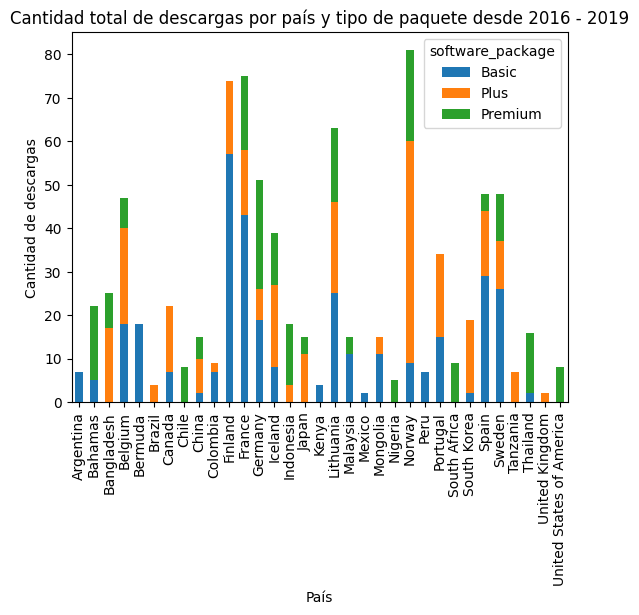

In [328]:
pivot_table.plot(kind='bar', stacked=True)

# Configurar el título y los ejes del gráfico
plt.title('Cantidad total de descargas por país y tipo de paquete desde 2016 - 2019')
plt.xlabel('País')
plt.ylabel('Cantidad de descargas')

plt.show()

### Evolución año tras año de la descarga de los paquetes

In [308]:
merge_df['year_of_download'] = merge_df['date_of_download'].apply(lambda x: x.year)
merge_df.drop(columns='year')

,username,last_name,first_name,date_of_download,software_package,country,score,year_of_download
typing.Literal[<no_default>],,,,,,,,
0,dittoafar45,Andersen,Leocadia,2016-03-04,Basic,France,3,2016
1,prowlingglistering253,Lucero,Chad,2016-03-07,Premium,France,5,2016
2,expectant2deranged,Randall,Stone,2016-04-06,Plus,Belgium,4,2016
3,sulphateplummer,Braun,Emelia,2016-04-08,Basic,Germany,9,2016
4,woatok,Velez,Ridley,2016-06-24,Basic,Portugal,7,2016
...,...,...,...,...,...,...,...,...
142,twiddlingpickaxe,Nichols,Jaylah,2017-07-17,Plus,Spain,7,2017
143,joltcobbey,Townsend,Retha,2017-10-12,Plus,Iceland,8,2017
144,overdraftcode664,Waller,Daren,2018-01-15,Plus,Norway,4,2018


In [309]:
date_download = merge_df.groupby(['year_of_download', 'software_package' ]).agg({ 'score': 'sum'}).reset_index()
date_download.head()

,year_of_download,software_package,score
0,2016,Basic,90
1,2016,Plus,50
2,2016,Premium,42
3,2017,Basic,49
4,2017,Plus,76


In [310]:
pivot_date = date_download.pivot(
    index = 'year_of_download',
    columns = 'software_package',
    values = 'score'
)
pivot_date.head()

software_package,Basic,Plus,Premium
year_of_download,,,
2016,90,50,42
2017,49,76,71
2018,58,62,41
2019,100,30,40
2020,37,70,16


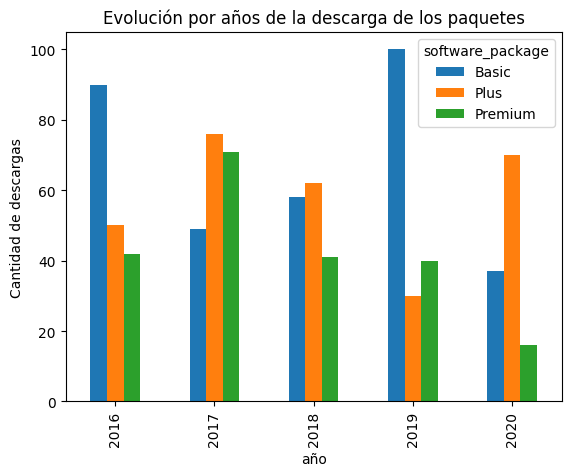

In [311]:
pivot_date.plot(kind='bar')

# Configurar el título y los ejes del gráfico
plt.title('Evolución por años de la descarga de los paquetes')
plt.xlabel('año')
plt.ylabel('Cantidad de descargas')

plt.show()

### Evolución año tras año de la descarga de paquetes por paises

In [338]:
country_year = merge_df.drop(columns='year')
country_year.head()

,username,last_name,first_name,date_of_download,software_package,country,score,year_of_download
typing.Literal[<no_default>],,,,,,,,
0,dittoafar45,Andersen,Leocadia,2016-03-04,Basic,France,3,2016
1,prowlingglistering253,Lucero,Chad,2016-03-07,Premium,France,5,2016
2,expectant2deranged,Randall,Stone,2016-04-06,Plus,Belgium,4,2016
3,sulphateplummer,Braun,Emelia,2016-04-08,Basic,Germany,9,2016
4,woatok,Velez,Ridley,2016-06-24,Basic,Portugal,7,2016


In [339]:
country_2016_down = country_year.query('year_of_download == 2016')

In [340]:
country_2016_down.head()

,username,last_name,first_name,date_of_download,software_package,country,score,year_of_download
typing.Literal[<no_default>],,,,,,,,
0,dittoafar45,Andersen,Leocadia,2016-03-04,Basic,France,3,2016
1,prowlingglistering253,Lucero,Chad,2016-03-07,Premium,France,5,2016
2,expectant2deranged,Randall,Stone,2016-04-06,Plus,Belgium,4,2016
3,sulphateplummer,Braun,Emelia,2016-04-08,Basic,Germany,9,2016
4,woatok,Velez,Ridley,2016-06-24,Basic,Portugal,7,2016


In [341]:
date_country_2016 = country_2016_down.groupby(['country', 'software_package' ])['score'].sum().reset_index()
date_country_2016.head()

,country,software_package,score
0,Bangladesh,Plus,8
1,Belgium,Plus,15
2,Colombia,Basic,5
3,Finland,Basic,11
4,Finland,Plus,10


In [342]:
pivot_country_2016 = date_country_2016.pivot(
    index='country',
    columns='software_package',
    values='score')

In [343]:
pivot_country_2016.head()

software_package,Basic,Plus,Premium
country,,,
Bangladesh,NaN,8.0,NaN
Belgium,NaN,15.0,NaN
Colombia,5.0,NaN,NaN
Finland,11.0,10.0,NaN
France,10.0,7.0,15.0


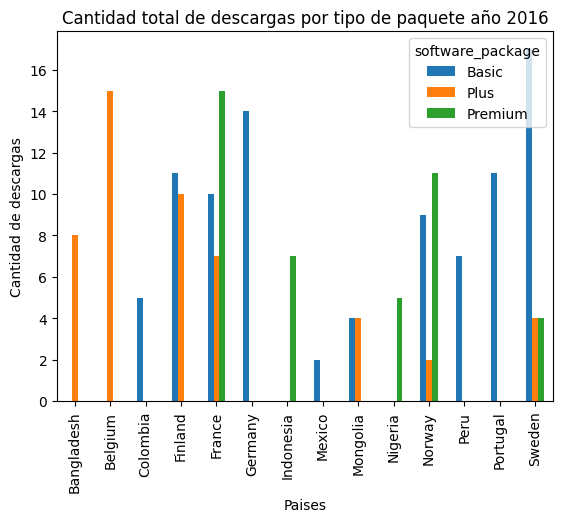

In [335]:
pivot_country_2016.plot(kind='bar')

# Configurar el título y los ejes del gráfico
plt.title('Cantidad total de descargas por tipo de paquete año 2016')
plt.xlabel('Paises')
plt.ylabel('Cantidad de descargas')

plt.show()

In [ ]:
country_2016.